In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from agent import Agent

Using device:  cuda:0
Using pretrained model: VideoPinballNoFrameskip-v4_10000


[]

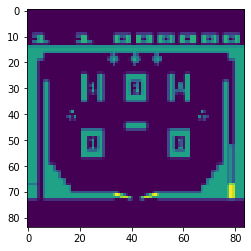

In [2]:
game_name = 'VideoPinballNoFrameskip-v4' # 'Breakout-v0' # 'VideoPinball-v0'
device = 'cuda:0'
chkpnt_name = 'VideoPinballNoFrameskip-v4_10000'
pretrained_name = 'VideoPinballNoFrameskip-v4_10000' # 'VideoPinballNoFrameskip-v4_10000'
verbosity = 0

agent = Agent(game_name, device, chkpnt_name, pretrained_name, verbosity)

plt.imshow(agent.sanity_check_screen())
plt.plot()

In [3]:
if pretrained_name != None:
    print('Eps decay overrided to continue training...')
    agent.eps_decay = 1
metrics = agent.train()

Eps decay overrided to continue training...
Episode  0
Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10
Episode  11
Episode  12
Episode  13
Episode  14
Episode  15
Episode  16
Episode  17
Episode  18
Episode  19
Episode  20
Episode  21
Episode  22
Episode  23
Episode  24
Episode  25
Episode  26
Episode  27
Episode  28
Episode  29
Episode  30
Episode  31
Episode  32
Episode  33
Episode  34
Episode  35
Episode  36
Episode  37
Episode  38
Episode  39
Episode  40
Episode  41
Episode  42
Episode  43
Episode  44
Episode  45
Episode  46
Episode  47
Episode  48
Episode  49
Saving model and metrics ...
Episode  50
Episode  51
Episode  52
Episode  53
Episode  54
Episode  55
Episode  56
Episode  57
Episode  58
Episode  59
Episode  60
Episode  61
Episode  62
Episode  63
Episode  64
Episode  65
Episode  66
Episode  67
Episode  68
Episode  69
Episode  70
Episode  71
Episode  72
Episode  73
Episode  74
Episode  75
Episode  76
Episode  77
E

KeyboardInterrupt: 

In [4]:
if 'metrics' not in locals():
    import pickle
    with open('models/VideoPinballNoFrameskip-v4_10000.metrics', 'rb') as metrics_file:
        metrics = pickle.load(metrics_file)

rewards = metrics['rewards']
losses = metrics['losses']
steps = metrics['steps']
cum_steps = metrics['cum_steps']

assert len(rewards) == len(losses) == len(steps)

episodes_info = list(zip(rewards, losses, steps, cum_steps))
for i, (reward, loss, step, cum_step) in enumerate(episodes_info):
    print('Episode %d :' % i)
    print('Step - ', step)
    print('Cumulative steps - ', cum_step)
    print('Reward - ', reward)
    print('Loss - ', loss)
    print('\n')

Episode 0 :
Step -  648
Cumulative steps -  648
Reward -  24.0
Loss -  0.02364618331193924


Episode 1 :
Step -  3172
Cumulative steps -  3820
Reward -  153.0
Loss -  0.06639689207077026


Episode 2 :
Step -  2051
Cumulative steps -  5871
Reward -  90.0
Loss -  0.06099477782845497


Episode 3 :
Step -  1180
Cumulative steps -  7051
Reward -  67.0
Loss -  0.08595005422830582


Episode 4 :
Step -  3808
Cumulative steps -  10859
Reward -  196.0
Loss -  0.04402824863791466


Episode 5 :
Step -  1614
Cumulative steps -  12473
Reward -  87.0
Loss -  0.056510038673877716


Episode 6 :
Step -  1951
Cumulative steps -  14424
Reward -  70.0
Loss -  0.03518342226743698


Episode 7 :
Step -  2115
Cumulative steps -  16539
Reward -  109.0
Loss -  0.12126432359218597


Episode 8 :
Step -  3227
Cumulative steps -  19766
Reward -  153.0
Loss -  0.15686196088790894


Episode 9 :
Step -  4038
Cumulative steps -  23804
Reward -  255.0
Loss -  0.10220281034708023


Episode 10 :
Step -  2284
Cumulative ste



Episode 327 :
Step -  3323
Cumulative steps -  814988
Reward -  201.0
Loss -  0.04142175614833832


Episode 328 :
Step -  1632
Cumulative steps -  816620
Reward -  108.0
Loss -  0.054066747426986694


Episode 329 :
Step -  3798
Cumulative steps -  820418
Reward -  202.0
Loss -  0.03822426497936249


Episode 330 :
Step -  1914
Cumulative steps -  822332
Reward -  116.0
Loss -  0.0577579028904438


Episode 331 :
Step -  941
Cumulative steps -  823273
Reward -  62.0
Loss -  0.08062849938869476


Episode 332 :
Step -  1849
Cumulative steps -  825122
Reward -  57.0
Loss -  0.06980019062757492


Episode 333 :
Step -  510
Cumulative steps -  825632
Reward -  15.0
Loss -  0.0396713949739933


Episode 334 :
Step -  830
Cumulative steps -  826462
Reward -  5.0
Loss -  0.029937172308564186


Episode 335 :
Step -  5321
Cumulative steps -  831783
Reward -  282.0
Loss -  0.03947532922029495


Episode 336 :
Step -  1010
Cumulative steps -  832793
Reward -  51.0
Loss -  0.10989683866500854


Episode

Reward -  367.0
Loss -  0.06750872731208801


Episode 658 :
Step -  3518
Cumulative steps -  1613309
Reward -  224.0
Loss -  0.06669794023036957


Episode 659 :
Step -  1059
Cumulative steps -  1614368
Reward -  29.0
Loss -  0.047976866364479065


Episode 660 :
Step -  1484
Cumulative steps -  1615852
Reward -  70.0
Loss -  0.09668774902820587


Episode 661 :
Step -  2735
Cumulative steps -  1618587
Reward -  167.0
Loss -  0.09817376732826233


Episode 662 :
Step -  2925
Cumulative steps -  1621512
Reward -  220.0
Loss -  0.04735112935304642


Episode 663 :
Step -  1935
Cumulative steps -  1623447
Reward -  133.0
Loss -  0.09840108454227448


Episode 664 :
Step -  1485
Cumulative steps -  1624932
Reward -  69.0
Loss -  0.0718296617269516


Episode 665 :
Step -  3062
Cumulative steps -  1627994
Reward -  211.0
Loss -  0.07193978130817413


Episode 666 :
Step -  5273
Cumulative steps -  1633267
Reward -  386.0
Loss -  0.07771747559309006


Episode 667 :
Step -  1987
Cumulative steps -  1

Step -  2494
Cumulative steps -  2562177
Reward -  191.0
Loss -  0.0697648674249649


Episode 991 :
Step -  5892
Cumulative steps -  2568069
Reward -  378.0
Loss -  0.03791464865207672


Episode 992 :
Step -  1244
Cumulative steps -  2569313
Reward -  55.0
Loss -  0.04962453246116638


Episode 993 :
Step -  2260
Cumulative steps -  2571573
Reward -  128.0
Loss -  0.0592958927154541


Episode 994 :
Step -  1552
Cumulative steps -  2573125
Reward -  79.0
Loss -  0.06824418157339096


Episode 995 :
Step -  2061
Cumulative steps -  2575186
Reward -  118.0
Loss -  0.10159724950790405


Episode 996 :
Step -  1517
Cumulative steps -  2576703
Reward -  95.0
Loss -  0.0871126800775528


Episode 997 :
Step -  1369
Cumulative steps -  2578072
Reward -  82.0
Loss -  0.9060815572738647


Episode 998 :
Step -  855
Cumulative steps -  2578927
Reward -  33.0
Loss -  0.026416469365358353


Episode 999 :
Step -  617
Cumulative steps -  2579544
Reward -  25.0
Loss -  0.03035655803978443


Episode 1000 :


Reward -  21.0
Loss -  0.059133611619472504


Episode 1284 :
Step -  2267
Cumulative steps -  3395091
Reward -  143.0
Loss -  0.04639577493071556


Episode 1285 :
Step -  5942
Cumulative steps -  3401033
Reward -  430.0
Loss -  0.0647302120923996


Episode 1286 :
Step -  2916
Cumulative steps -  3403949
Reward -  174.0
Loss -  0.0597991980612278


Episode 1287 :
Step -  1966
Cumulative steps -  3405915
Reward -  88.0
Loss -  0.0605473667383194


Episode 1288 :
Step -  3015
Cumulative steps -  3408930
Reward -  204.0
Loss -  0.15301167964935303


Episode 1289 :
Step -  1980
Cumulative steps -  3410910
Reward -  149.0
Loss -  0.035479575395584106


Episode 1290 :
Step -  4590
Cumulative steps -  3415500
Reward -  314.0
Loss -  0.030644305050373077


Episode 1291 :
Step -  2873
Cumulative steps -  3418373
Reward -  131.0
Loss -  0.05420807749032974


Episode 1292 :
Step -  2537
Cumulative steps -  3420910
Reward -  152.0
Loss -  0.048895448446273804


Episode 1293 :
Step -  1471
Cumulativ

Loss -  0.03927391767501831


Episode 1594 :
Step -  2605
Cumulative steps -  4387077
Reward -  187.0
Loss -  0.06027832627296448


Episode 1595 :
Step -  1916
Cumulative steps -  4388993
Reward -  111.0
Loss -  0.05419998615980148


Episode 1596 :
Step -  2150
Cumulative steps -  4391143
Reward -  91.0
Loss -  0.036041200160980225


Episode 1597 :
Step -  8241
Cumulative steps -  4399384
Reward -  615.0
Loss -  0.043109677731990814


Episode 1598 :
Step -  3687
Cumulative steps -  4403071
Reward -  220.0
Loss -  0.09425348043441772


Episode 1599 :
Step -  3022
Cumulative steps -  4406093
Reward -  180.0
Loss -  0.04440223425626755


Episode 1600 :
Step -  4282
Cumulative steps -  4410375
Reward -  323.0
Loss -  0.04086145758628845


Episode 1601 :
Step -  1142
Cumulative steps -  4411517
Reward -  80.0
Loss -  0.0550994947552681


Episode 1602 :
Step -  1338
Cumulative steps -  4412855
Reward -  66.0
Loss -  0.054525017738342285


Episode 1603 :
Step -  3160
Cumulative steps -  44160

Cumulative steps -  5468944
Reward -  36.0
Loss -  0.014847343787550926


Episode 1897 :
Step -  1539
Cumulative steps -  5470483
Reward -  54.0
Loss -  1.7241034507751465


Episode 1898 :
Step -  876
Cumulative steps -  5471359
Reward -  49.0
Loss -  0.007066457532346249


Episode 1899 :
Step -  808
Cumulative steps -  5472167
Reward -  26.0
Loss -  0.019276795908808708


Episode 1900 :
Step -  1896
Cumulative steps -  1897
Reward -  62.0
Loss -  0.012599140405654907


Episode 1901 :
Step -  957
Cumulative steps -  2855
Reward -  41.0
Loss -  0.04214545339345932


Episode 1902 :
Step -  1158
Cumulative steps -  4014
Reward -  70.0
Loss -  0.02385641634464264


Episode 1903 :
Step -  659
Cumulative steps -  4674
Reward -  25.0
Loss -  0.055655792355537415


Episode 1904 :
Step -  589
Cumulative steps -  5264
Reward -  16.0
Loss -  0.028587158769369125


Episode 1905 :
Step -  467
Cumulative steps -  5732
Reward -  8.0
Loss -  0.022008221596479416


Episode 1906 :
Step -  1669
Cumulativ

Loss -  0.02592669241130352


Episode 2196 :
Step -  3335
Cumulative steps -  336856
Reward -  169.0
Loss -  0.05711923539638519


Episode 2197 :
Step -  1306
Cumulative steps -  338163
Reward -  52.0
Loss -  0.05691765621304512


Episode 2198 :
Step -  878
Cumulative steps -  339042
Reward -  47.0
Loss -  0.10071975737810135


Episode 2199 :
Step -  1251
Cumulative steps -  340294
Reward -  63.0
Loss -  0.019598251208662987




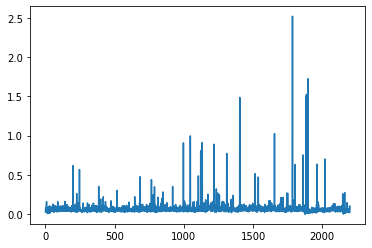

In [5]:
plt.plot(range(len(losses)), losses)
plt.show()

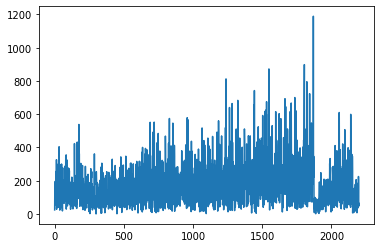

In [6]:
plt.plot(range(len(rewards)), rewards)
plt.show()

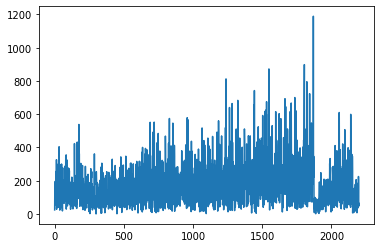

In [7]:
rewards_correct = rewards

plt.plot(range(len(rewards_correct)), rewards_correct)
plt.show()

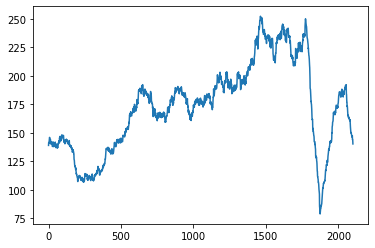

In [8]:
moving_avg_window = 100
averaged_rewards = np.convolve(rewards_correct, np.ones(moving_avg_window), 'valid') / moving_avg_window

plt.plot(range(len(averaged_rewards)), averaged_rewards)
plt.show()

In [9]:
eval_reward = 0
for i in range(moving_avg_window):
    _R = agent.evaluate()
    print(i, _R)
    eval_reward += _R
eval_reward /= moving_avg_window

print('\nAvg. reward is ', eval_reward)

0 44.0
1 29.0
2 93.0
3 162.0
4 121.0
5 28.0
6 63.0
7 109.0
8 201.0
9 351.0
10 76.0
11 192.0
12 132.0
13 66.0
14 157.0
15 204.0
16 165.0
17 88.0
18 95.0
19 77.0
20 94.0
21 309.0
22 104.0
23 25.0
24 177.0
25 154.0
26 71.0
27 188.0
28 91.0
29 68.0
30 142.0
31 155.0
32 114.0
33 175.0
34 49.0
35 27.0
36 94.0
37 175.0
38 203.0
39 43.0
40 115.0
41 173.0
42 107.0
43 120.0
44 77.0
45 61.0
46 63.0
47 95.0
48 61.0
49 119.0
50 159.0
51 47.0
52 340.0
53 420.0
54 177.0
55 56.0
56 119.0
57 50.0
58 227.0
59 186.0
60 192.0
61 193.0
62 99.0
63 98.0


KeyboardInterrupt: 

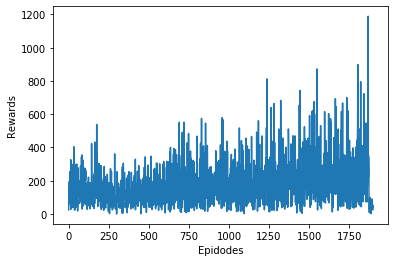

In [16]:
# It is observed that continuing training from checkpoint doesn't load Optimizer state
# So, it is better to get rid of continued training stats

rewards_correct2 = rewards[:1900]

plt.plot(range(len(rewards_correct2)), rewards_correct2)
plt.xlabel('Epidodes')
plt.ylabel('Rewards')
plt.show()

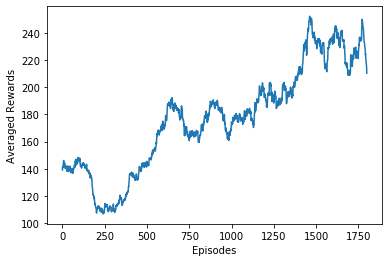

In [17]:
moving_avg_window = 100
averaged_rewards2 = np.convolve(rewards_correct2, np.ones(moving_avg_window), 'valid') / moving_avg_window

plt.plot(range(len(averaged_rewards2)), averaged_rewards2)
plt.xlabel('Episodes')
plt.ylabel('Averaged Rewards')
plt.show()